<FarthestFirstTraversal(Data, k) 
    Centers ← the set consisting of a single randomly chosen point from Data
    while |Centers| < k 
        DataPoint ← the point in Data maximizing d(DataPoint, Centers) 
        add DataPoint to Centers 
    return Centers>

# Week 2 SoftClustering

In [ ]:
Code Challenge: Implement the expectation maximization algorithm for soft k-means clustering.
     Input: Integers k and m, followed by a stiffness parameter β, followed by a set of points Data in m-dimensional space.
     Output: A set Centers consisting of k points (centers) resulting from applying the expectation maximization algorithm for soft
     k-means clustering. Select the first k points from Data as the first centers for the algorithm and run the algorithm for 100
    E-steps and 100 M-steps. Results should be accurate up to three decimal places.

In [11]:
#manual data read
#trick k-Means
data="""
1.3 1.1
1.3 0.2
0.6 2.8
3.0 3.2
1.2 0.7
1.4 1.6
1.2 1.0
1.2 1.1
0.6 1.5
1.8 2.6
1.2 1.3
1.2 1.0
0.0 1.9""".split()
#x=[float(i) for i in data[::2]]
#y=[float(i) for i in data[1::2]]
xy=[(float(a),float(b)) for a,b in zip(data[::2],data[1::2]) ]
#xy=[[float(a)] for a in data]
#centers=[[1.0], [3.0]]
k=2
m=2
b=2.7
xy

[(1.3, 1.1),
 (1.3, 0.2),
 (0.6, 2.8),
 (3.0, 3.2),
 (1.2, 0.7),
 (1.4, 1.6),
 (1.2, 1.0),
 (1.2, 1.1),
 (0.6, 1.5),
 (1.8, 2.6),
 (1.2, 1.3),
 (1.2, 1.0),
 (0.0, 1.9)]

In [12]:
centers=xy[:2]
centers

[(1.3, 1.1), (1.3, 0.2)]

In [13]:
import random as rnd
import math
import numpy as np

In [2]:
#reads with no centers
import random as rnd
import math
import numpy as np
xy=[]
with open('dataset_10933_8.txt', 'r') as myfile:
    #first_line = myfile.readline()#skipping header
    first_line=myfile.readline()
    k,m=int(first_line.split()[0]),int(first_line.split()[1])
    first_line=myfile.readline()
    b=float(first_line.strip())
    print 'number of centers: ',k
    print 'dimensions: ',m
    print 'beta: ',b
    #next(myfile)#skipping separator
    for line in myfile:
        
        #print line
        xy.append(tuple(float(i) for i in line.split()))
        
#xy=[(float(a),float(b),float(c),float(d),float(e)) for a,b,c,d,e in zip(data[::5],data[1::5],data[2::5],data[3::5],data[4::5]) ]


#print 'number of centers: ',k
#print 'dimensions: ',d
#xy=[(float(a),float(b)) for a,b in zip(data[::2],data[1::2]) ]



number of centers:  6
dimensions:  4
beta:  2.2


In [3]:
#xy

In [14]:
#xy=[(float(a),float(b)) for a,b in zip(data[::2],data[1::2]) ]
#xy=[(float(a),float(b),float(c)) for a,b,c in zip(data[::3],data[1::3],data[2::3]) ]
def EuclideanDistance(p1,p2):
    d1,d2=len(p1),len(p2)
    if d1!=d2:
        print("Dimensions do not match!")
        return
    dif2 = 0
    for i in range(d1):        
        dif2 += (p1[i]-p2[i])**2
    #print dif2
    return math.sqrt(dif2)

def FarthestFirstTraversal(points, k):
    centers=[]
    new_center=points[0]
    #new_center=rnd.choice(list((set(points).difference(centers))))
    #new_center=(0.8, 12.0, 17.5, 0.9, 7.2)
    centers.append(new_center)
#     rndPnt=points[rnd.randint(0,len(points)-1)]
#     if rndPnt not in centers:
#         centers.append(rndPnt)
        #del points[(points.index(rndPnt))]
    while(len(centers)<k):
        maxDist=0 
        for point in list((set(points).difference(centers))):
            cent_min_dist=np.inf
            for center in centers:
                dist=EuclideanDistance(center,point)
                if dist < cent_min_dist:
                    cent_min_dist=dist
                
                #print dist, point, center
            if ((cent_min_dist > maxDist)):
                maxDist=cent_min_dist

                new_center=point
                    #print new_center
        
        if maxDist:
            #new_center=rnd.choice(list((set(points).difference(centers))))
            centers.append(new_center)
        else:
            new_center=rnd.choice(list((set(points).difference(centers))))
            print "!!!Random center created: ", new_center
        #print centers
                #else:
                    #print "zero length"
                    #print center, point, dist, maxDist
        #if new_center not in centers:

            
    return centers
#FarthestFirstTraversal(xy,k)  

## Distortion Error

In [7]:
import random as rnd
import math
import numpy as np
xy=[]
centers=[]
with open('SquaredErrorDistortion.txt', 'r') as myfile:
    first_line = myfile.readline()#skipp the initial input title
    first_line = myfile.readline() #reading the info line
    k,d=int(first_line.split()[0]),int(first_line.split()[1])
    #reading centers
    cnt=0
    for line in myfile:
        #print line
        cnt+=1
        #print cnt
        if cnt <= k:
            print line
            centers.append(tuple(float(i) for i in line.split()))
        elif cnt==k+1:
            continue
        else:
            xy.append(tuple(float(i) for i in line.split()))
            
       
#     for line in myfile:
#         #print line
#         xy.append(tuple(float(i) for i in line.split()))
        
#xy=[(float(a),float(b),float(c),float(d),float(e)) for a,b,c,d,e in zip(data[::5],data[1::5],data[2::5],data[3::5],data[4::5]) ]


print 'number of centers: ',k
print 'dimensions: ',d

IOError: [Errno 2] No such file or directory: 'SquaredErrorDistortion.txt'

In [15]:
clusters=FormClusters(xy, centers,k)
Distortion(clusters, centers)

NameError: name 'FormClusters' is not defined

In [9]:
xy

[]

In [16]:
def PartitionFunc(dist,beta):
    return math.exp(-beta*dist)

In [17]:
PartitionFunc(2.5,0.5)

0.2865047968601901

In [18]:
xy[-5:]

[(0.6, 1.5), (1.8, 2.6), (1.2, 1.3), (1.2, 1.0), (0.0, 1.9)]

In [19]:
n = 2
X = np.empty(shape=(0,k))
for i in range(len(xy)):
    tmp=list()
    for j in range(k):
        d=EuclideanDistance(xy[i],centers[j])
        tmp.append(PartitionFunc(d,b))
    X=np.append(X, [np.array(tmp)/sum(tmp)], axis=0)
X

array([[ 0.91908653,  0.08091347],
       [ 0.08091347,  0.91908653],
       [ 0.90937957,  0.09062043],
       [ 0.88237433,  0.11762567],
       [ 0.56549568,  0.43450432],
       [ 0.91780537,  0.08219463],
       [ 0.85753577,  0.14246423],
       [ 0.89797772,  0.10202228],
       [ 0.85932472,  0.14067528],
       [ 0.91293872,  0.08706128],
       [ 0.91517377,  0.08482623],
       [ 0.85753577,  0.14246423],
       [ 0.8398189 ,  0.1601811 ]])

In [20]:
np.array(xy)[:,1]

array([ 1.1,  0.2,  2.8,  3.2,  0.7,  1.6,  1. ,  1.1,  1.5,  2.6,  1.3,
        1. ,  1.9])

In [21]:
l=np.array([1, 3.5, 2])
sum(l/sum(l))

1.0

In [22]:
def Centers2SoftClusters(data,cent,num_cent=k,beta=b):
    HM = np.empty(shape=(0,num_cent))
    for i in range(len(data)):
        tmp=list()
        for j in range(num_cent):
            d=EuclideanDistance(data[i],cent[j])
            tmp.append(PartitionFunc(d,beta))
        HM=np.append(HM, [np.array(tmp)/sum(tmp)], axis=0)
    return HM
Centers2SoftClusters(xy, centers)
    

array([[ 0.91908653,  0.08091347],
       [ 0.08091347,  0.91908653],
       [ 0.90937957,  0.09062043],
       [ 0.88237433,  0.11762567],
       [ 0.56549568,  0.43450432],
       [ 0.91780537,  0.08219463],
       [ 0.85753577,  0.14246423],
       [ 0.89797772,  0.10202228],
       [ 0.85932472,  0.14067528],
       [ 0.91293872,  0.08706128],
       [ 0.91517377,  0.08482623],
       [ 0.85753577,  0.14246423],
       [ 0.8398189 ,  0.1601811 ]])

In [23]:
def SoftClusters2Centers(data,HM,dim=m,num_cent=k):
    points=np.array(data)
    new_centers=[]
    for i in range(num_cent):
        new_ctr=[]
        for j in range(dim):
            new_ctr.append(np.dot(points[:,j],HM[:,i])/sum(HM[:,i]))
        new_centers.append(new_ctr)
    return new_centers
            
    

In [24]:
hm=Centers2SoftClusters(xy, centers)
SoftClusters2Centers(xy,hm,m,k)

[[1.2336611356139489, 1.6717838053495411],
 [1.2191156796102811, 1.0012108537980728]]

In [25]:
np.dot(np.ones(len(xy)),X[:,1])

2.5846396958512079

In [26]:
centers

[(1.3, 1.1), (1.3, 0.2)]

In [27]:
i=0
new_centers=centers
while(i<100):
    
    hiddenMatrix=Centers2SoftClusters(xy, new_centers,k, b)
    new_centers=SoftClusters2Centers(xy,hiddenMatrix,m,k)
    print new_centers
    i+=1
final_centers=new_centers

print i
print final_centers

[[1.2336611356139489, 1.6717838053495411], [1.2191156796102811, 1.0012108537980728]]
[[1.2768092015456189, 2.0008424773384275], [1.1916511827674079, 1.1455976973882447]]
[[1.3484697494000635, 2.2048327983810481], [1.1597026512290625, 1.1361121971227295]]
[[1.4233788256756978, 2.3485159709020516], [1.1318211420214972, 1.1223174833819245]]
[[1.4892197366002127, 2.4438610088553876], [1.1119929315416268, 1.1223664022951518]]
[[1.5416489722578259, 2.5060323438487222], [1.098856767157826, 1.1279019823903154]]
[[1.5805473422103657, 2.5469307390748881], [1.0903548061561739, 1.1336231054312778]]
[[1.6079770799165827, 2.5738392476204996], [1.0849207135113761, 1.1381297213373436]]
[[1.6266652805365014, 2.5914135874778603], [1.0814675746536035, 1.1413687035598137]]
[[1.6391123351834287, 2.6027971565827914], [1.0792754823261603, 1.1435970466955434]]
[[1.6472799989242171, 2.6101245390065415], [1.0778825548824031, 1.1450911712318921]]
[[1.6525872504433785, 2.614822118806011], [1.0769963009569186, 1.1

In [28]:
def EM(points, k, m,startRandomCenters=True, iterations=1000, presision=1e-5, verbose=True, centers=None):
    
    if startRandomCenters:
        centers=RandomCenters(points,k)
    else:
        #doing the first k points as centers
        if centers==None:
            centers=points[:k]


    i=0
    if verbose:
        print "####### ENTERING K-MEANS ALGORITHM #######"
    while(True):
        
        hiddenMatrix=Centers2SoftClusters(points, centers,k, b)
        new_centers=SoftClusters2Centers(points,hiddenMatrix,m,k)


        i+=1
        maxDiff =max([EuclideanDistance(centers[j], new_centers[j]) for j in range(len(new_centers))])

        if verbose:
            print "===  iteration: ",i," ==="
            print 'centers:', [tuple( '%.3f' % elem for elem in tup ) for tup in new_centers]
            print 'max difference: ', maxDiff
        #[[np.round(float(i), 2) for i in nested] for nested in outerlist]
    #     print 'maxDistances: ', maxDistances
    #     print 'distortion: ', distortion
    #     print 'maxDifference: ', maxDiff
    #     print "distortionDifference: ", distortionDifference

        if(i>=iterations):
            if verbose:
                print "==============================="
                print "Maximum iterations was reached!"
            break
        if(maxDiff<presision):
            if verbose:
                print "======================================"
                print "EM algorithm has converged!"
            break
        centers=new_centers

    #printing_formatting centers
    if verbose:
        for center in centers:
            line=""
            for coordinate in center:
                line+=str('%.3f' % coordinate)+" "
            print line
    return centers,maxDiff

In [29]:
#EM(xy,k,m,startRandomCenters=False,iterations=100,verbose=True,centers=None,presision=None)
EM(xy,k,m,startRandomCenters=False,iterations=100,verbose=True,centers=None,presision=None)

####### ENTERING K-MEANS ALGORITHM #######
===  iteration:  1  ===
centers: [('1.234', '1.672'), ('1.219', '1.001')]
max difference:  0.805283245528
===  iteration:  2  ===
centers: [('1.277', '2.001'), ('1.192', '1.146')]
max difference:  0.331875526673
===  iteration:  3  ===
centers: [('1.348', '2.205'), ('1.160', '1.136')]
max difference:  0.21621120507
===  iteration:  4  ===
centers: [('1.423', '2.349'), ('1.132', '1.122')]
max difference:  0.162037723306
===  iteration:  5  ===
centers: [('1.489', '2.444'), ('1.112', '1.122')]
max difference:  0.115869330773
===  iteration:  6  ===
centers: [('1.542', '2.506'), ('1.099', '1.128')]
max difference:  0.0813271150754
===  iteration:  7  ===
centers: [('1.581', '2.547'), ('1.090', '1.134')]
max difference:  0.0564425541329
===  iteration:  8  ===
centers: [('1.608', '2.574'), ('1.085', '1.138')]
max difference:  0.0384247100546
===  iteration:  9  ===
centers: [('1.627', '2.591'), ('1.081', '1.141')]
max difference:  0.0256535818909


([[1.6621292077004175, 2.6231300925735663],
  [1.0754390250735666, 1.1478787337691199]],
 0.0)

In [30]:
from collections import defaultdict



def EuclideanDistance(p1,p2):
    d1,d2=len(p1),len(p2)
    if d1!=d2:
        print("Dimensions do not match!")
        return
    dif2 = 0
    for i in range(d1):        
        dif2 += (p1[i]-p2[i])**2
    #print dif2
    return math.sqrt(dif2)

def SquaredDistance(p1,p2):
    d1,d2=len(p1),len(p2)
    if d1!=d2:
        print("Dimensions do not match!")
        return
    dif2 = 0
    for i in range(d1):        
        dif2 += (p1[i]-p2[i])**2
    #print dif2
    return dif2

def FormClusters(points, centers, k):
    
    
    cnt_dct=defaultdict(list)
    for point in points:
        dist2cent=[]
        for center in centers:
            #print center, point
            dist2cent.append(EuclideanDistance(center,point))
            
        #print points.index(point)
        cnt_dct[dist2cent.index(min(dist2cent))].append(points.index(point))

    return cnt_dct
#clusters=MaxDistDistortion(xy, centers,k)

def MaxDistance(clusters, centers):
    dist_dct={}
    for i in range(len(clusters)):
        cl_points=np.array(xy)[clusters[i]]
        maxDist=0
        #dist2sum=0
        for point in cl_points:
            dist=EuclideanDistance(centers[i],point)
            if dist>maxDist:
                maxDist=dist
        dist_dct[i]=maxDist
    return dist_dct
#dist=MaxDistance(clusters, centers)        
#dist

def Distortion(clusters, centers, debug=False):
    distortion_dct={}
    count=0
    sum2dict={}
    sum2dist=0
    numPoints={}
    for i in range(len(clusters)):
        cl_points=np.array(xy)[clusters[i]]
        num_points=len(cl_points)
        count+=num_points
        
        #dist2sum=0
        sum2distClust=0
        for point in cl_points:
            
            dist=EuclideanDistance(centers[i],point)
            sum2distClust+=dist**2
        sum2dict[i]=sum2distClust
        sum2dist+=sum2distClust
        numPoints[i]=num_points
        if debug:
            print num_points
        if num_points==0:
            if debug:
                print "zero number of points"
            distortion_dct[i]=sum2distClust
        else:
            distortion_dct[i]=sum2distClust/num_points
        
        #sanity check
#         denominator=1
#         sum_term=0
#         number_product=np.prod(numPoints.values())
#         for i in range(len(sum2dict)):
#             denominator=denominator*numPoints[i]
            
#             sum_term+=sum2dict[i]*number_product/numPoints[i]
#         print sum_term/number_product
    return sum2dist/count,distortion_dct
#Distortion(clusters, centers, debug=True)   
#distortion


In [120]:

dist=0
ctrs=[(4, 5), (7, 4)]
cl_points=[(2, 6), (4, 9), (5, 7), (6, 5), (8, 3)]
###########(2, 6), (4, 9), (5, 7), (6, 5), (8, 3) 
maxDist=0
#dist2sum=0
for point in cl_points:
    
    dist=min([EuclideanDistance(i,point) for i in ctrs])
    if dist>maxDist:
        maxDist=dist
maxDist

4.0

In [142]:

ctrs=[ (4, 5), (7, 4)]
xy=[ (2, 6), (4, 9), (5, 7), (6, 5), (8, 3) ]
clusters=FormClusters(xy,ctrs,2)
print Distortion(clusters, ctrs)


(6.0, {0: 8.666666666666666, 1: 2.0000000000000004})


In [136]:
len(list(clusters))

2

In [143]:
xy=[(17, 0, -4), (3, 14, 23), (9, 7, 16), (7, 3, 5)]
clusters=FormClusters(xy,[rnd.choice(xy)],1)
#clusters
GravityCenters(clusters,dimensions=3)

[(9, 6, 10)]

In [118]:
clusters

NameError: name 'clusters' is not defined

In [39]:
def Distortion2(clusters, centers, debug=False):
    distortion_dct={}
    count=0
    sum2dict={}
    sum2dist=0
    numPoints={}
    for i in range(len(clusters)):
        cl_points=np.array(xy)[clusters[i]]
        num_points=len(cl_points)
        count+=num_points
        
        #dist2sum=0
        sum2distClust=0
        for point in cl_points:
            
            dist=EuclideanDistance(centers[i],point)
            sum2distClust+=dist**2
        sum2dict[i]=sum2distClust
        sum2dist+=sum2distClust
        numPoints[i]=num_points
        if debug:
            print num_points
        if num_points==0:
            if debug:
                print "zero number of points"
            distortion_dct[i]=sum2distClust
        else:
            distortion_dct[i]=sum2distClust/num_points
        
        #sanity check
#         denominator=1
#         sum_term=0
#         number_product=np.prod(numPoints.values())
#         for i in range(len(sum2dict)):
#             denominator=denominator*numPoints[i]
            
#             sum_term+=sum2dict[i]*number_product/numPoints[i]
    #print numPoints
    return sum(sum2dict.values())/sum(numPoints.values()),distortion_dct
Distortion2(clusters, centers, debug=True)  

NameError: name 'clusters' is not defined

In [465]:
centers

[(5.8, 18.3, 27.0, 16.5, 9.3),
 (0.1, 15.3, 9.7, 1.8, 5.3),
 (6.4, 13.6, 2.6, 7.3, 2.8),
 (22.1, 4.8, 0.0, 17.7, 8.1),
 (5.8, 18.3, 27.0, 16.5, 9.3),
 (1.3, 1.2, 16.9, 10.8, 14.4),
 (18.1, 7.6, 14.5, 7.3, 2.1)]

In [447]:
l=[3,4,5]
np.prod(l)
#clusters

60

In [4]:
d=3

## K-Means Lloyd algorithm 

In [31]:
def GravityCenters(clusters, dimensions=d):
    centers=[]
    
    for i in range(len(clusters)):
        cl_points=np.array(xy)[clusters[i]]
        cl_size=len(cl_points)
        if dimensions==1:
            centers.append([(np.sum(cl_points))/cl_size])
        else:
            centers.append(tuple((np.sum(cl_points[:,[i]]))/cl_size for i in range(dimensions)))
    return centers

#GravityCenters(clusters)

def RandomCenters(points, k):
    centers=[]
    for i in range(k):
        centers.append(rnd.choice(points))
    return centers

In [6]:
d

3

In [567]:
centers

[[0.0], [3.0]]

In [562]:
iterations=1000
presision=1e-5

#centers=RandomCenters(xy,k)

clusters=FormClusters(xy, centers,k)
maxDistances=MaxDistance(clusters, centers)
distortion,distortion_clusters=Distortion(clusters,centers)

print 'Random centers:', centers
print 'maxDistances: ', maxDistances
print 'distortion: ', distortion
print 'distortion clusters: ', distortion_clusters

i=0
print "####### ENTERING K-MEANS ALGORITHM #######"
while(True):

    new_centers=GravityCenters(clusters,d)
    new_clusters=FormClusters(xy,new_centers,k)
    i+=1
    maxDiff =max([EuclideanDistance(centers[j], new_centers[j]) for j in range(len(new_centers))])
    maxDistances=MaxDistance(new_clusters, new_centers)
    newDistortion,newDistortion_clusters=Distortion(new_clusters,new_centers)
    distortionDifference=distortion-newDistortion
    
    #print "===  iteration: ",i," ==="
    #print 'centers:', [tuple( '%.2f' % elem for elem in tup ) for tup in new_centers]
    #[[np.round(float(i), 2) for i in nested] for nested in outerlist]
#     print 'maxDistances: ', maxDistances
#     print 'distortion: ', distortion
#     print 'maxDifference: ', maxDiff
#     print "distortionDifference: ", distortionDifference
        
    if(i>1000):
        print "==============================="
        print "Maximum iterations was reached!"
        break
    if(maxDiff<presision):
        print "======================================"
        print "K-Means Lloyd algorithm has converged!"
        break
    centers=new_centers
    clusters=new_clusters
    distortion=newDistortion
    distortion_clusters=newDistortion_clusters
print "maxIterations", i
print 'maxDistances: ', maxDistances
print 'distortion: ', distortion
print 'maxDifference: ', maxDiff
print "distortionDifference: ", distortionDifference
print 'distortion clusters: ', distortion_clusters
#printing_formatting centers
for center in centers:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line
    

Random centers: [[0.0], [3.0]]
maxDistances:  {0: 1.0, 1: 1.0}
distortion:  0.5
distortion clusters:  {0: 0.5, 1: 0.5}
####### ENTERING K-MEANS ALGORITHM #######
K-Means Lloyd algorithm has converged!
maxIterations 2
maxDistances:  {0: 0.5, 1: 0.5}
distortion:  0.25
maxDifference:  0.0
distortionDifference:  0.0
distortion clusters:  {0: 0.25, 1: 0.25}
0.500 
2.500 


In [46]:
d=m

In [32]:
def K_Means(points, k, m,startRandomCenters=True, iterations=1000, presision=1e-5, verbose=True, centers=None):
    
    if startRandomCenters:
        centers=RandomCenters(points,k)
    else:
        #doing the first k points as centers
        if centers==None:
            centers=points[:k]
    clusters=FormClusters(points, centers,k)
    maxDistances=MaxDistance(clusters, centers)
    distortion,distortion_clusters=Distortion(clusters,centers)
    if verbose:
        if startRandomCenters:
            print 'Random centers: ', centers
        elif (startRandomCenters==False and centers):
            print 'Initialized centers: ', centers
        else:
            print 'First points centers: ', centers
        print 'maxDistances: ', maxDistances
        print 'distortion: ', distortion
        print 'distortion clusters: ', distortion_clusters

    i=0
    if verbose:
        print "####### ENTERING K-MEANS ALGORITHM #######"
    while(True):

        new_centers=GravityCenters(clusters,d)
        new_clusters=FormClusters(points,new_centers,k)
        i+=1
        maxDiff =max([EuclideanDistance(centers[j], new_centers[j]) for j in range(len(new_centers))])
        maxDistances=MaxDistance(new_clusters, new_centers)
        newDistortion,newDistortion_clusters=Distortion(new_clusters,new_centers)
        distortionDifference=distortion-newDistortion
        if verbose:
            print "===  iteration: ",i," ==="
            print 'centers:', [tuple( '%.2f' % elem for elem in tup ) for tup in new_centers]
        #[[np.round(float(i), 2) for i in nested] for nested in outerlist]
    #     print 'maxDistances: ', maxDistances
    #     print 'distortion: ', distortion
    #     print 'maxDifference: ', maxDiff
    #     print "distortionDifference: ", distortionDifference

        if(i>1000):
            if verbose:
                print "==============================="
                print "Maximum iterations was reached!"
            break
        if(maxDiff<presision):
            if verbose:
                print "======================================"
                print "K-Means Lloyd algorithm has converged!"
            break
        centers=new_centers
        clusters=new_clusters
        distortion=newDistortion
    if verbose:
        print "maxIterations", i
        print 'maxDistances: ', maxDistances
        print 'distortion: ', distortion
        print 'maxDifference: ', maxDiff
        print "distortionDifference: ", distortionDifference
        print 'distortion clusters: ', distortion_clusters

    #printing_formatting centers
    if verbose:
        for center in centers:
            line=""
            for coordinate in center:
                line+=str('%.3f' % coordinate)+" "
            print line
    return centers,maxDistances,maxDiff,distortionDifference,distortion_clusters,i,distortion

In [48]:
K_Means(xy, k, d, startRandomCenters=True, verbose=True)

Random centers:  [(0.0740005814437768, -0.411426245726465, -0.028569152196771, -0.790772037862, -0.839959587489532, -1.6959938131099, -2.78868571061353), (0.0144995696951152, 0.0740005814437768, 0.0588936890535686, 0.0144995696951152, 0.251538766995964, 2.39592867633114, 1.68965987938785), (0.358453970912476, 0.168122758808327, 0.643856189774725, 0.785875194647153, 1.15200309344505, 1.94341647163363, 2.64385618977472), (-0.150559676575381, -0.443606651475615, -0.0976107966264223, -0.790772037862, -1.07724299893246, -2.03913839390696, -2.52105073690096), (0.104697378666693, -0.0143552929770701, 0.556393348524385, -0.575312330687437, -0.7311832415722, -1.25096157353322, -2.52105073690096)]
maxDistances:  {0: 1.2173356202033319, 1: 2.6179089220248524, 2: 2.706311351944566, 3: 1.4449507821022172, 4: 1.5170782003705985}
distortion:  1.6372776385
distortion clusters:  {0: 0.6078467467895728, 1: 2.188460577182471, 2: 2.4388497286169235, 3: 0.8962047551070556, 4: 0.7800452953250482}
####### EN

([(0.11119964513702452,
   -0.019184590814095386,
   0.041568787050222405,
   -0.65113667528763541,
   -0.69281545200522476,
   -1.7338493612846324,
   -2.5501310705521831),
  (-0.22238983950254607,
   -0.043967013485238453,
   0.18929367799905547,
   -0.013712845279676065,
   -0.067208762810432879,
   1.6763563335328664,
   2.6304401936100636),
  (-0.056299177495377849,
   0.14332868079065339,
   0.43632130881989101,
   0.81931626445645311,
   0.95927545623078736,
   2.8169054826093376,
   2.2265720273358793),
  (0.036705554721300014,
   -0.10881695481556213,
   -0.15821369843691593,
   -1.0369205477394086,
   -1.1219895118256893,
   -2.5140129489124718,
   -2.5221431941391388),
  (0.17045296748464628,
   0.054924452368912996,
   0.24347455225722275,
   -0.15388127842722357,
   -0.21997074941491709,
   -1.4403453360591481,
   -2.5510829766210503)],
 {0: 1.1128028097156462,
  1: 2.216809512139488,
  2: 2.2588786853697123,
  3: 1.377994434435356,
  4: 1.3417097660859414},
 0.0,
 0.0,
 {

In [50]:
%%time
minDist=np.inf
for i in range(100):
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=True)
    if data[-1]<minDist:
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "maxIterations", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

C:\Users\Andriy\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andriy\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


maxIterations 9
maxDistances:  {0: 2.093178939277606, 1: 1.483930067324356, 2: 1.3904883966279094, 3: 2.155405175516437, 4: 1.4724463268095656}
distortion:  0.890867682549
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 1.56938369141446, 1: 1.7500452575321979, 2: 2.219468559856203, 3: 2.5940972107578664, 4: 0.8211498660569437}
===== centers =====
-0.149 0.006 0.201 0.383 0.521 2.535 1.795 
-0.196 -0.005 0.275 -0.035 -0.143 1.245 2.803 
0.055 -0.095 -0.110 -0.914 -0.952 -2.252 -2.559 
-0.038 0.194 0.538 1.001 1.109 3.031 2.751 
0.154 0.039 0.182 -0.335 -0.405 -1.512 -2.537 
Wall time: 9.76 s


### Exercise Break:
Pick your favorite parameter k and run the Lloyd algorithm 1,000 times on the 230-gene diauxic shift dataset, each time initialized with a new set of k randomly chosen centers. Construct a histogram of the squared error distortions of the resulting 1,000 outcomes. How many times did you have to run the Lloyd algorithm before finding the run that scored highest among your 1,000 runs?

In [33]:
#read from csv
import csv
xy=[]
with open('230genes_log_expression.txt', 'rb') as csvfile:
    csvreader = csv.reader(csvfile, delimiter='\t', quotechar='|')
    
    for row in csvreader:
        if csvreader.line_num == 1:
            header = row
            coord_names=header[-7:]
        else:
            #print row
            xy.append(tuple(float(i) for i in row[-7:]))
            #print (tuple(float(i) for i in row[-7:]))
m=len(xy[0])
k=6

In [55]:
%%time
minDist=np.inf
KMeansResults=[]
for i in range(1000):
    data=K_Means(xy,k,m, verbose=False, startRandomCenters=True)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

C:\Users\Andriy\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Andriy\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: invalid value encountered in double_scalars


BestIteration:  173
maxIterations:  8
maxDistances:  {0: 1.393219598517385, 1: 1.4663797686624238, 2: 1.857940624107897, 3: 1.685362183914563, 4: 1.5590233248483023, 5: 1.3506761438382628}
distortion:  0.780022771101
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 1.3756696311187824, 1: 0.7216885411636613, 2: 2.844723425988536, 3: 2.3313777918228014, 4: 2.0198036130004335, 5: 2.064953803587333}
===== centers =====
0.059 -0.098 -0.104 -0.906 -0.950 -2.237 -2.561 
0.153 0.042 0.183 -0.330 -0.397 -1.509 -2.536 
-0.006 0.198 0.614 1.126 1.216 2.964 2.687 
-0.130 0.032 0.256 0.460 0.645 2.465 1.662 
-0.274 0.050 -0.008 -0.038 -0.078 2.942 2.829 
-0.183 -0.041 0.282 -0.022 -0.113 1.120 2.786 
Wall time: 1min 56s


In [56]:
%%time
minDist=np.inf
KMeansResults=[]
for i in range(1000):
    data=EM(xy,k,m, verbose=False, startRandomCenters=True)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  597
maxIterations:  [[0.1190463808251761, -0.00868420440241751, 0.078700917377453702, -0.53929726884884721, -0.5984252205043723, -1.7737994026440629, -2.5450219697497714], [-0.11490823485568886, 0.070836566466596695, 0.30112937181424465, 0.50359500965172754, 0.60075092576261568, 2.5378163337882085, 2.1717319292617843], [-0.066767253391675316, 0.15387717722423735, 0.49100077635750827, 0.89907057298041049, 1.0175813488620455, 2.8848288728925064, 2.5133884141508314], [0.11903823296200552, -0.0086956774922438383, 0.078673013440869952, -0.53935873286107405, -0.59848486273678092, -1.7738694369644508, -2.5450263011207728], [-0.11492559956420437, 0.070817428786533326, 0.3010931890921475, 0.50350609954148906, 0.60064973287358703, 2.5377655169425002, 2.1717048426390728], [-0.20381507864807893, -0.032378523795505182, 0.24540410095132176, -0.009287890203718889, -0.08460424323280126, 1.4064150824617934, 2.7298833033649812]]
maxDistances:  8.84556962565e-06
distortion:  8.84556962565

IndexError: tuple index out of range

In [ ]:
%%time
minDist=np.inf
EM=[]
for i in range(1000):
    data=EM(xy,k,m, verbose=False, startRandomCenters=True)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

In [24]:

import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
bins=50
plt.plot(N, KMeansResults)
plt.axis([0, 1010, 0.8,1.6])
plt.axvline(x=KMeansResults.index(min(KMeansResults)), color="r", linestyle="dashed")
plt.axhline(y=min(KMeansResults), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()


In [23]:
#plotting log of Distortions for better visualization
import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
y=np.log10(KMeansResults)
bins=50
plt.plot(N, y)
plt.axis([0, 1010, 2*min(y),max(y)+max(y)*0.1])
plt.axvline(x=list(y).index(min(y)), color="r", linestyle="dashed")
plt.axhline(y=min(y), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()

## k-means++ Initializer 
We have thus far not paid much attention to how initial centers are chosen in the Lloyd algorithm, which selects them randomly. Similarly to FartherstFirstTraversal, k-Means++Initializer picks k centers one at a time, but instead of choosing the point farthest from those picked so far, it chooses each point at random in such a way that distant points are more likely to be chosen than nearby points. Specifically, the probability of selecting a center DataPoint from Data is proportional to the squared distance of DataPoint from the centers already chosen, i.e., to d(DataPoint, Centers)2. 

For a simple example, say that we have just three data points, and that the squared distances from these points to the existing centers Centers are equal to 1, 4, and 5. Then the probability of k-Means++Initializer selecting each of these points as the next center is 1/10, 4/10, and 5/10, respectively.

k-Means++Initializer(Data, k)


In [ ]:
k-Means++Initializer(Data, k)
      Centers ← the set consisting of a single randomly chosen point from Data
    while |Centers| < k 
        randomly select DataPoint from Data with probability proportional to d(DataPoint, Centers)2 
        add DataPoint to Centers
    return Centers

In [34]:
def KM_initializer(points, k):
    centers=[]
    #dist2=[]
    #new_center=points[0]
    rnd_center=rnd.choice(points)
    #new_center=(0.8, 12.0, 17.5, 0.9, 7.2)
    #centers.append(new_center)
#     rndPnt=points[rnd.randint(0,len(points)-1)]
#     if rndPnt not in centers:
#         centers.append(rndPnt)
        #del points[(points.index(rndPnt))]
    while(len(centers)<k):
        dist2=[]
        if centers==[]:
            for i in range(len(points)):
                dist2.append(SquaredDistance(rnd_center, points[i]))
        else:
            for i in range(len(points)):
                dist2.append(min([SquaredDistance(j, points[i]) for j in centers]))
        weights=np.array(dist2)/float(sum(dist2))
        new_center=np.random.choice(range(len(points)), p=weights)
        centers.append(points[new_center])
    return centers

In [110]:
def KM_initializer2(points, k):
    centers=[]
    #dist2=[]
    #new_center=points[0]
    new_center=rnd.choice(points)
    #new_center=(0.8, 12.0, 17.5, 0.9, 7.2)
    centers.append(new_center)
#     rndPnt=points[rnd.randint(0,len(points)-1)]
#     if rndPnt not in centers:
#         centers.append(rndPnt)
        #del points[(points.index(rndPnt))]
    while(len(centers)<k):
        dist2=[]
        for i in range(len(points)):
            dist2.append(min([SquaredDistance(j, points[i]) for j in centers]))
        weights=np.array(dist2)/float(sum(dist2))
        new_center=np.random.choice(range(len(points)), p=weights)
        centers.append(points[new_center])
    return centers

In [50]:
def MakePlot(points): 
    import matplotlib.pyplot as plt
    import matplotlib.colors as colors
    import matplotlib.cm as cmx
    import numpy as np

    # define some random data that emulates your indeded code:
    NCURVES = len(points)
    np.random.seed(101)
    curves = [np.random.random(20) for i in range(NCURVES)]
    values = range(NCURVES)

    fig = plt.figure()
    fig.set_size_inches(8,8)
    ax = fig.add_subplot(111)
    # replace the next line 
    #jet = colors.Colormap('jet')
    # with
    jet = cm = plt.get_cmap('jet') 
    cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
    print scalarMap.get_clim()

    lines = []
    for idx in range(len(points)):
        line = points[idx]
        colorVal = scalarMap.to_rgba(values[idx])
        colorText = (
            'color: (%4.2f,%4.2f,%4.2f)'%(colorVal[0],colorVal[1],colorVal[2])
            )
        retLine, = ax.plot(line,
                           color=colorVal,
                           label=colorText)
        lines.append(retLine)
    #added this to get the legend to work
    handles,labels = ax.get_legend_handles_labels()
    #ax.legend(handles, labels, loc='upper right')
    plt.ylim(-4.4, 4.4)
    ax.grid()
    plt.show()
    return fig

In [86]:
centers=KM_initializer(xy,k)

In [87]:
d=m
data1=K_Means(xy,k,m, verbose=True, startRandomCenters=False, centers=centers)

Initialized centers:  [(-0.632268215499513, -0.344828496997441, -0.238786859587116, -0.189033824390017, -0.250961573533219, 1.12029423371771, 3.05889368905357), (-0.978195629681652, 0.0588936890535686, 0.415037499278844, 0.184424571137428, -0.189033824390017, 2.47393118833241, 1.55639334852439), (-0.0426443374084937, -0.0976107966264223, -0.0143552929770701, -0.799087306074004, -0.839959587489532, -2.24792751344359, -2.38681094647222), (-0.150559676575381, 0.377069649079823, 0.62148837674627, 1.59946207041627, 2.25153876699596, 3.64385618977472, 3.47393118833241), (-0.111031312388744, 0.0588936890535686, 0.0144995696951152, 0.104697378666693, 0.3040061868901, 2.73696559416621, 3.32192809488736), (0.2688167584278, 0.15200309344505, 0.454031630894707, -0.36737106564853, -0.286881147788162, -1.66902676550963, -2.45154083301783)]
maxDistances:  {0: 1.920583118669594, 1: 2.499891655003832, 2: 1.3649858492140112, 3: 2.4200726929417233, 4: 2.09985768863935, 5: 1.6428502695833254}
distortion: 

cluster 0
(0, 35)


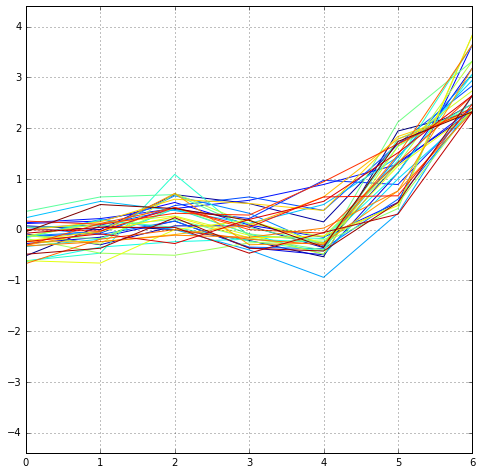

cluster 1
(0, 30)


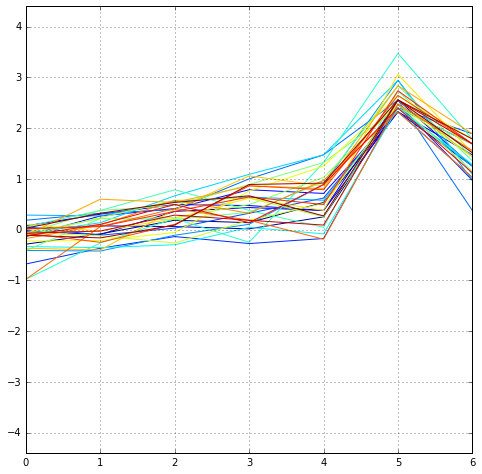

cluster 2
(0, 39)


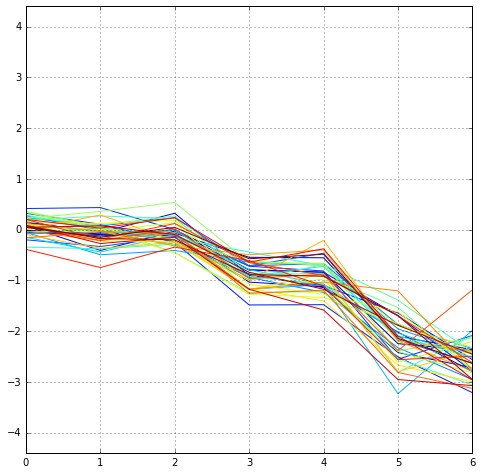

cluster 3
(0, 39)


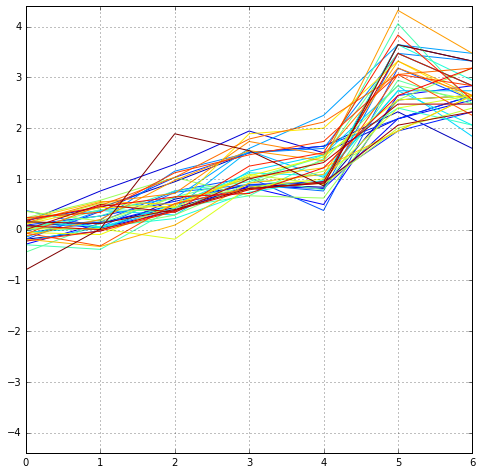

cluster 4
(0, 23)


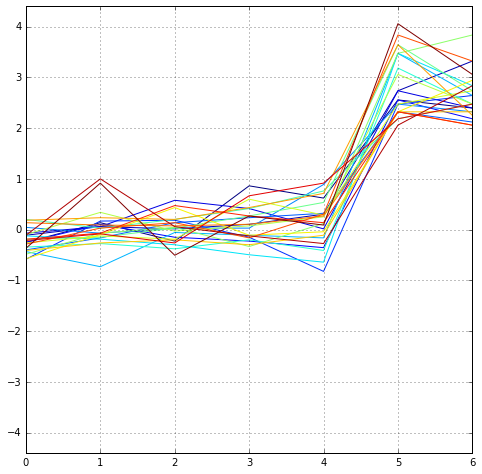

cluster 5
(0, 58)


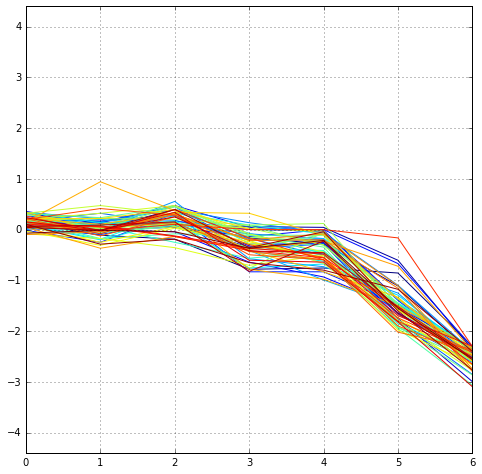

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
cl1=FormClusters(xy,data1[0],k)
len(cl1)
for key,value in cl1.items():
    print "cluster %d"%key
    plt.show(MakePlot(np.array(xy)[value]))

In [93]:
data2=EM(xy,k,m,startRandomCenters=True,verbose=False)

cluster 0
(0, 37)


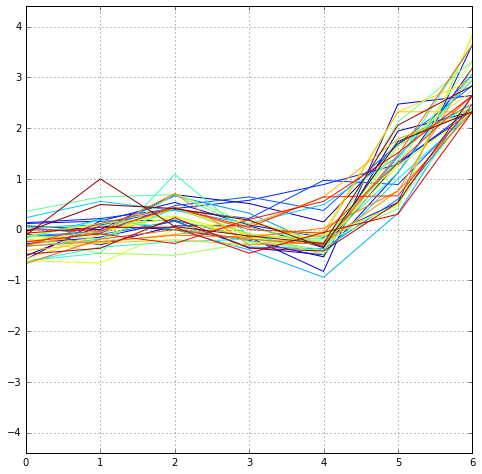

cluster 1
(0, 42)


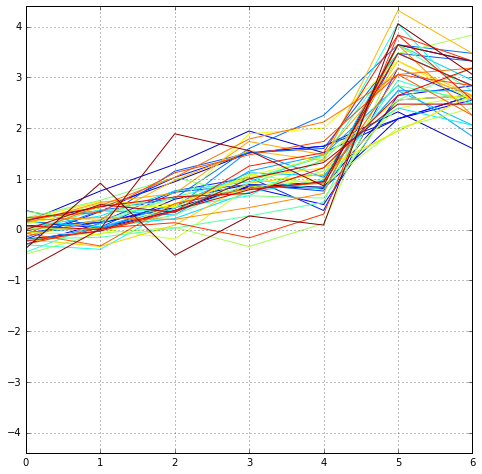

cluster 2
(0, 49)


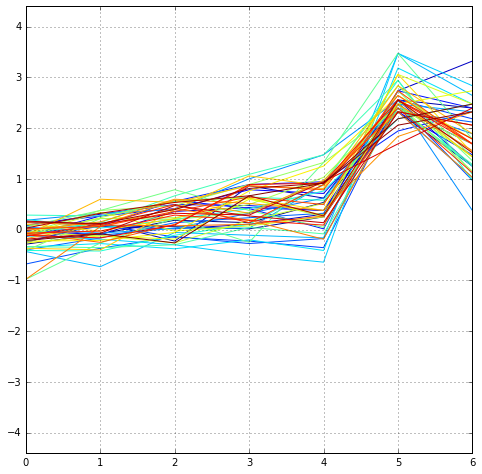

cluster 3
(0, 19)


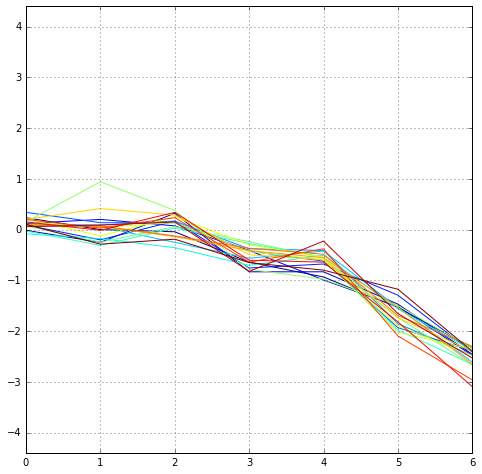

cluster 4
(0, 38)


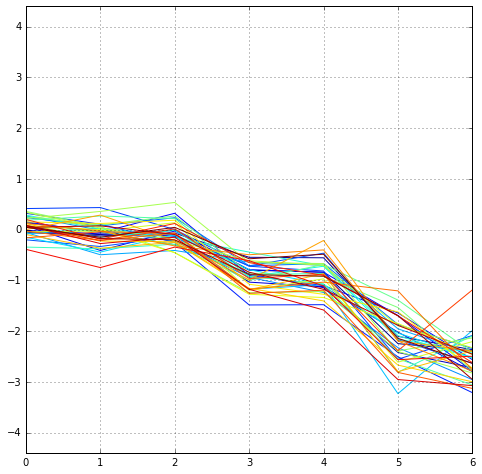

cluster 5
(0, 39)


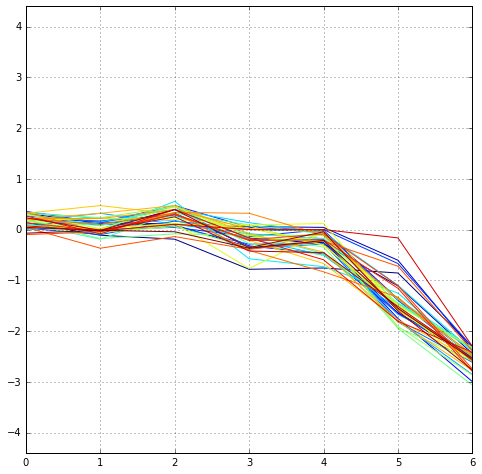

In [94]:
%matplotlib inline
#data2=EM(xy,k,m,startRandomCenters=False,verbose=False,centers=centers,presision=None)
import matplotlib.pyplot as plt
cl2=FormClusters(xy,data2[0],k)
len(cl2)
for key,value in cl2.items():
    print "cluster %d"%key
    plt.show(MakePlot(np.array(xy)[value]))

cluster 0
(0, 44)


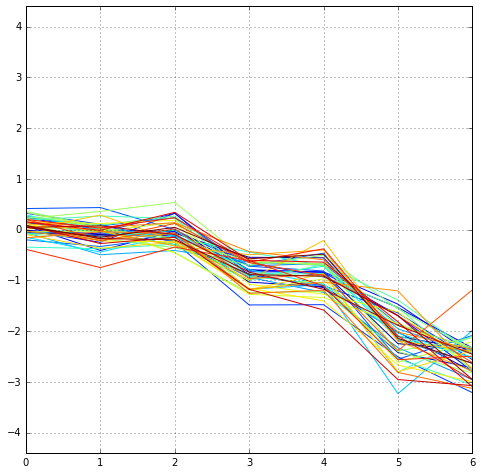

cluster 1
(0, 25)


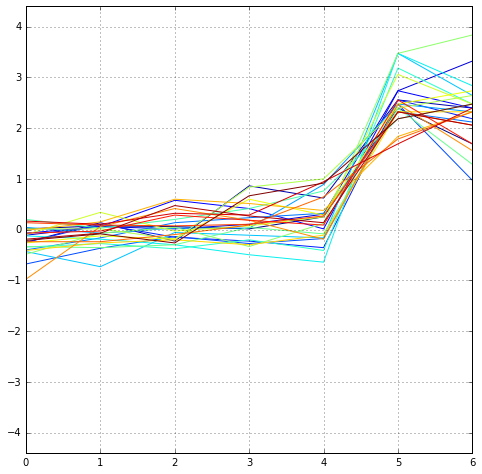

cluster 2
(0, 39)


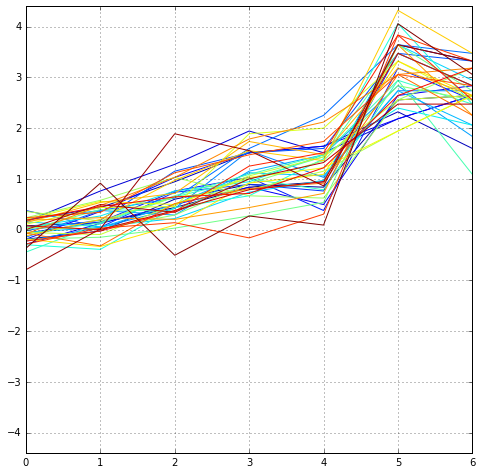

cluster 3
(0, 35)


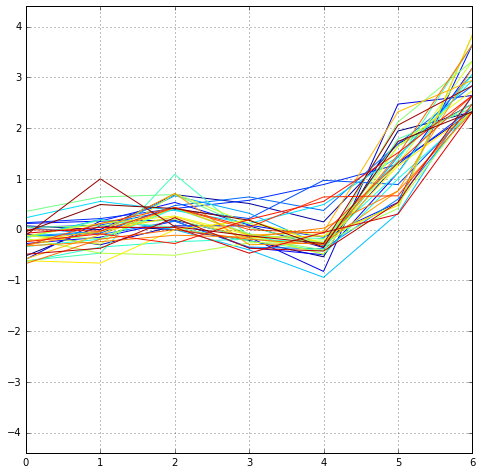

cluster 4
(0, 53)


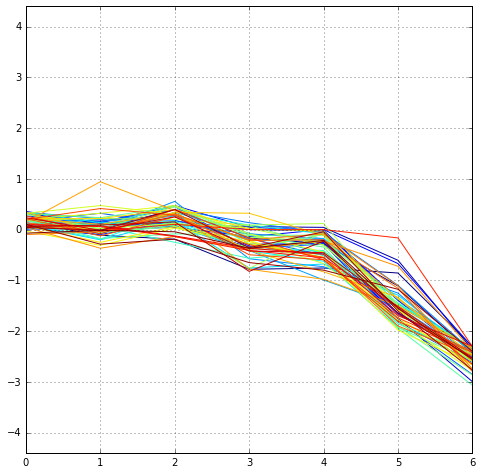

cluster 5
(0, 28)


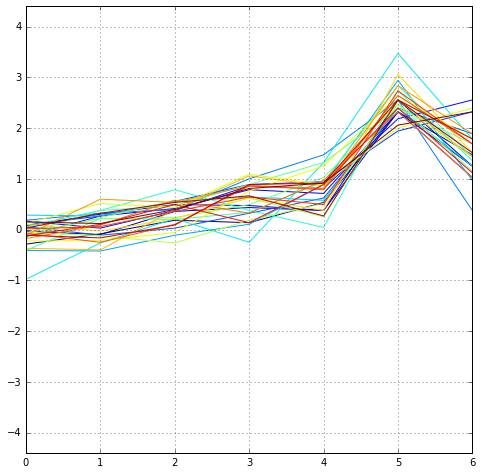

In [85]:
%matplotlib inline
data2=EM(xy,k,m,startRandomCenters=False,verbose=False,centers=centers,presision=None)
import matplotlib.pyplot as plt
cl2=FormClusters(xy,data2[0],k)
len(cl2)
for key,value in cl2.items():
    print "cluster %d"%key
    plt.show(MakePlot(np.array(xy)[value]))

In [77]:
%%time
minDist=np.inf
KMeansResults=[]
for i in range(100):
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=True)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  42
maxIterations:  9
maxDistances:  {0: 1.4724463268095656, 1: 1.3904883966279094, 2: 2.155405175516437, 3: 2.093178939277606, 4: 1.483930067324356}
distortion:  0.890867682549
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 0.7852483648612861, 1: 0.9065144844804376, 2: 2.0930081972198855, 3: 1.7186397734408922, 4: 1.7217063304152116}
===== centers =====
0.154 0.039 0.182 -0.335 -0.405 -1.512 -2.537 
0.055 -0.095 -0.110 -0.914 -0.952 -2.252 -2.559 
-0.038 0.194 0.538 1.001 1.109 3.031 2.751 
-0.149 0.006 0.201 0.383 0.521 2.535 1.795 
-0.196 -0.005 0.275 -0.035 -0.143 1.245 2.803 
Wall time: 8.38 s


In [113]:
%%time
#doing with Random centers
minDist=np.inf
KMeansResults=[]
for i in range(10):
    #centers=KM_initializer(xy, k)
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=True)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  4
maxIterations:  10
maxDistances:  {0: 2.214896898980774, 1: 1.4421530091752914, 2: 2.0409609639107567, 3: 1.3904883966279094, 4: 1.4724463268095656}
distortion:  0.89730267532
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 1.8580720299881772, 1: 3.5913782190393526, 2: 1.918794687736724, 3: 0.8582115932523149, 4: 1.2190823930888293}
===== centers =====
-0.097 0.053 0.252 0.496 0.639 2.483 1.867 
-0.212 -0.018 0.258 -0.059 -0.171 1.273 2.801 
-0.083 0.175 0.555 0.992 1.088 3.217 2.875 
0.055 -0.095 -0.110 -0.914 -0.952 -2.252 -2.559 
0.154 0.039 0.182 -0.335 -0.405 -1.512 -2.537 
Wall time: 912 ms


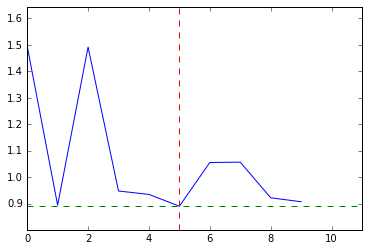

In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
plt.plot(N, KMeansResults)
plt.axis([0, len(N)+len(N)*0.1, min(KMeansResults)-min(KMeansResults)*0.1,max(KMeansResults)+max(KMeansResults)*0.1])
plt.axvline(x=KMeansResults.index(min(KMeansResults)), color="r", linestyle="dashed")
plt.axhline(y=min(KMeansResults), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()

In [114]:
%%time
#doing with k-Means initialization centers
minDist=np.inf
KMeansResults=[]
for i in range(10):
    centers=KM_initializer(xy, k)
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=False, centers=centers)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  8
maxIterations:  10
maxDistances:  {0: 1.9195143887213502, 1: 1.3904883966279094, 2: 1.4724463268095656, 3: 1.483930067324356, 4: 2.2103277173215496}
distortion:  0.892863387397
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 2.320571374147792, 1: 0.987752365323277, 2: 1.1865285331598658, 3: 1.3524376584148798, 4: 2.3406812467524185}
===== centers =====
-0.010 0.209 0.613 1.116 1.214 2.887 2.601 
0.055 -0.095 -0.110 -0.914 -0.952 -2.252 -2.559 
0.154 0.039 0.182 -0.335 -0.405 -1.512 -2.537 
-0.196 -0.005 0.275 -0.035 -0.143 1.245 2.803 
-0.170 -0.003 0.145 0.300 0.446 2.663 1.937 
Wall time: 987 ms


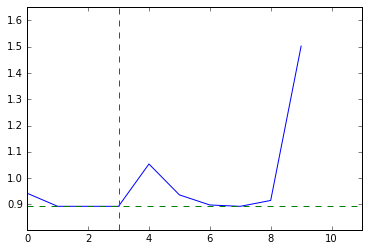

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
plt.plot(N, KMeansResults)
plt.axis([0, len(N)+len(N)*0.1, min(KMeansResults)-min(KMeansResults)*0.1,max(KMeansResults)+max(KMeansResults)*0.1])
plt.axvline(x=KMeansResults.index(min(KMeansResults)), color="r", linestyle="dashed")
plt.axhline(y=min(KMeansResults), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()

In [115]:
%%time
#doing with k-Means initialization2 centers
minDist=np.inf
KMeansResults=[]
for i in range(10):
    centers=KM_initializer2(xy, k)
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=False, centers=centers)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  8
maxIterations:  8
maxDistances:  {0: 1.4724463268095656, 1: 2.0666949238213466, 2: 2.167742431047133, 3: 1.4825978286478854, 4: 1.3904883966279094}
distortion:  0.892979071898
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 0.9998453938152904, 1: 1.7330761439930187, 2: 2.033042059700201, 3: 1.934877295154161, 4: 1.1737225111877265}
===== centers =====
0.154 0.039 0.182 -0.335 -0.405 -1.512 -2.537 
-0.168 -0.002 0.185 0.369 0.495 2.608 1.736 
-0.031 0.194 0.535 0.994 1.101 2.986 2.733 
-0.183 -0.004 0.275 -0.009 -0.082 1.285 2.768 
0.055 -0.095 -0.110 -0.914 -0.952 -2.252 -2.559 
Wall time: 845 ms


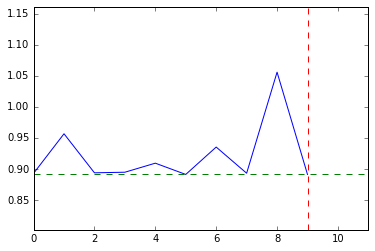

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
plt.plot(N, KMeansResults)
plt.axis([0, len(N)+len(N)*0.1, min(KMeansResults)-min(KMeansResults)*0.1,max(KMeansResults)+max(KMeansResults)*0.1])
plt.axvline(x=KMeansResults.index(min(KMeansResults)), color="r", linestyle="dashed")
plt.axhline(y=min(KMeansResults), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()

In [116]:
%%time
#doing with FarthestFirstTraversal initialization centers

minDist=np.inf
KMeansResults=[]
for i in range(10):
    centers=FarthestFirstTraversal(xy, k)
    #centers
    data=K_Means(xy,k,d, verbose=False, startRandomCenters=False, centers=centers)
    KMeansResults.append(data[-1])
    if data[-1]<minDist:
        bestIteration=i
        minDist=data[-1]
        #print data[-1]
        bestData=data
print "BestIteration: ", bestIteration
print "maxIterations: ", bestData[-2]
print 'maxDistances: ', bestData[1]
print 'distortion: ', bestData[-1]
print 'maxDifference: ', bestData[2]
print "distortionDifference: ", bestData[3]
print "distortionClusters: ", bestData[-3]
print "===== centers ====="
for center in bestData[0]:
    line=""
    for coordinate in center:
        line+=str('%.3f' % coordinate)+" "
    print line

BestIteration:  6
maxIterations:  12
maxDistances:  {0: 1.483930067324356, 1: 1.4051758693348575, 2: 2.155405175516437, 3: 1.4403806019798888, 4: 2.093178939277606}
distortion:  0.891120520153
maxDifference:  0.0
distortionDifference:  0.0
distortionClusters:  {0: 2.5926938546696707, 1: 2.09604928888348, 2: 2.586976075487188, 3: 2.3943790383705825, 4: 2.069383379788329}
===== centers =====
-0.196 -0.005 0.275 -0.035 -0.143 1.245 2.803 
0.072 -0.084 -0.083 -0.896 -0.922 -2.186 -2.568 
-0.038 0.194 0.538 1.001 1.109 3.031 2.751 
0.151 0.042 0.188 -0.298 -0.379 -1.495 -2.530 
-0.149 0.006 0.201 0.383 0.521 2.535 1.795 
Wall time: 721 ms


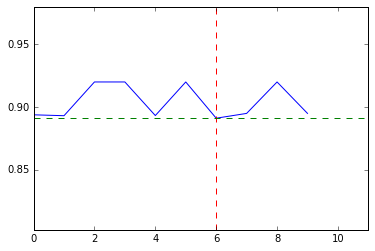

In [117]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

N=range(len(KMeansResults))
plt.plot(N, KMeansResults)
plt.axis([0, len(N)+len(N)*0.1, min(KMeansResults)-min(KMeansResults)*0.1,min(KMeansResults)+min(KMeansResults)*0.1])
plt.axvline(x=KMeansResults.index(min(KMeansResults)), color="r", linestyle="dashed")
plt.axhline(y=min(KMeansResults), color="g", linestyle="dashed")
#plt.axhline(y=)
plt.show()

In [74]:
def FarthestFirstTraversal(points, k):
    centers=[]
    #new_center=points[0]
    new_center=rnd.choice(list((set(points).difference(centers))))
    #new_center=(0.8, 12.0, 17.5, 0.9, 7.2)
    centers.append(new_center)
#     rndPnt=points[rnd.randint(0,len(points)-1)]
#     if rndPnt not in centers:
#         centers.append(rndPnt)
        #del points[(points.index(rndPnt))]
    while(len(centers)<k):
        maxDist=0 
        for point in list((set(points).difference(centers))):
            cent_min_dist=np.inf
            for center in centers:
                dist=EuclideanDistance(center,point)
                if dist < cent_min_dist:
                    cent_min_dist=dist
                
                #print dist, point, center
            if ((cent_min_dist > maxDist)):
                maxDist=cent_min_dist

                new_center=point
                    #print new_center
        
        if maxDist:
            #new_center=rnd.choice(list((set(points).difference(centers))))
            centers.append(new_center)
        else:
            new_center=rnd.choice(list((set(points).difference(centers))))
            print "!!!Random center created: ", new_center
        #print centers
                #else:
                    #print "zero length"
                    #print center, point, dist, maxDist
        #if new_center not in centers:

            
    return centers

In [25]:
lst=[3,5,10]
np.log10(lst)

array([ 0.47712125,  0.69897   ,  1.        ])

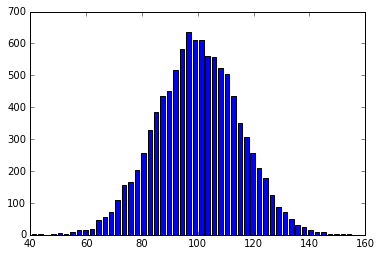

In [623]:
#KMeansResults
import matplotlib.pyplot as plt
import numpy as np

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)
hist, bins = np.histogram(x, bins=50)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

In [345]:
xy[-2:]

[(7.3, 12.9, 12.9, 2.5, 10.7), (4.9, 4.3, 13.8, 1.8, 9.2)]

In [152]:
np.sum(np.array(xy)[clusters[0]][:,[0]])

496.40000000000003

In [506]:
len(clusters[1])

178

In [507]:
len(np.array(xy)[clusters[1]])


178

In [508]:
xy[2]

(3.1, 4.7, 11.7, 11.8, 13.3)

In [509]:
dct[0]

[]

In [3]:

#random.choice(xy)
ctr=[]
for i in range(0,3):
    pnt=xy[rnd.randint(0,len(xy)-1)]
    if pnt not in ctr:
        ctr.append(pnt)
ctr

[(9.4, 7.5), (9.4, 9.6), (3.1, 6.6)]

In [291]:
data="""0.0 0.0
5.0 5.0
0.0 5.0
1.0 1.0
2.0 2.0
3.0 3.0
1.0 2.0""".split()
data

['0.0',
 '0.0',
 '5.0',
 '5.0',
 '0.0',
 '5.0',
 '1.0',
 '1.0',
 '2.0',
 '2.0',
 '3.0',
 '3.0',
 '1.0',
 '2.0']

In [293]:

#x=[float(i) for i in data[::2]]
#y=[float(i) for i in data[1::2]]
xy=[(float(a),float(b)) for a,b in zip(data[::2],data[1::2]) ]
xy

[(0.0, 0.0),
 (5.0, 5.0),
 (0.0, 5.0),
 (1.0, 1.0),
 (2.0, 2.0),
 (3.0, 3.0),
 (1.0, 2.0)]

In [295]:
EuclideanDistance((0,0),(5,0))

5.0

In [19]:
#xy=[(float(a),float(b)) for a,b in zip(data[::2],data[1::2]) ]
#xy=[(float(a),float(b),float(c)) for a,b,c in zip(data[::3],data[1::3],data[2::3]) ]
def EuclideanDistance(p1,p2):
    d1,d2=len(p1),len(p2)
    if d1!=d2:
        print("Dimensions do not match!")
        return
    dif2 = 0
    for i in range(d1):        
        dif2 += (p1[i]-p2[i])**2
    #print dif2
    return math.sqrt(dif2)

def FarthestFirstTraversal(points, k):
    centers=[]
    new_center=rnd.choice(list((set(points).difference(centers))))
    #new_center=(0.8, 12.0, 17.5, 0.9, 7.2)
    centers.append(new_center)
#     rndPnt=points[rnd.randint(0,len(points)-1)]
#     if rndPnt not in centers:
#         centers.append(rndPnt)
        #del points[(points.index(rndPnt))]
    while(len(centers)<k):
        maxDist=0 
        for point in list((set(points).difference(centers))):
            cent_min_dist=np.inf
            for center in centers:
                dist=EuclideanDistance(center,point)
                if dist < cent_min_dist:
                    cent_min_dist=dist
                
                #print dist, point, center
            if ((cent_min_dist > maxDist)):
                maxDist=cent_min_dist

                new_center=point
                    #print new_center
        
        if maxDist:
            #new_center=rnd.choice(list((set(points).difference(centers))))
            centers.append(new_center)
        else:
            new_center=rnd.choice(list((set(points).difference(centers))))
            print "!!!Random center created: ", new_center
        #print centers
                #else:
                    #print "zero length"
                    #print center, point, dist, maxDist
        #if new_center not in centers:

            
    return centers
FarthestFirstTraversal(xy,k)  

[(16.6, 9.6), (43.9, 12.8), (0.1, 31.5), (27.1, 29.3), (0.1, 0.4)]

In [325]:
b1 = [(1,2), (0,0)]
b2 = []
rnd.choice(list((set(b1).difference(b2))))

(0, 0)

In [344]:
EuclideanDistance((0.8, 12.0, 17.5, 0.9, 7.2),(31.1, 2.1, 12.5, 1.1, 2.5))

32.60720779214313

In [345]:
EuclideanDistance((0.3, 16.4, 8.9, 34.6, 24.6),(31.1, 2.1, 12.5, 1.1, 2.5))

52.6948764112793

In [346]:
EuclideanDistance((0.8, 12.0, 17.5, 0.9, 7.2),(32.3, 1.9, 5.1, 16.2, 8.8))



38.531415753901385

In [347]:
EuclideanDistance((0.3, 16.4, 8.9, 34.6, 24.6),(32.3, 1.9, 5.1, 16.2, 8.8))

42.85895472360473

Week 1 Quiz
Quiz, 8 questions
6/8 points (75%)
Congratulations! You passed!
Correct
1 / 1 points
1. 

True or False: The fact that only 13% of genes in S. cerevisiae are duplicated does not rule out the possibility of a whole-genome duplication.
Correct
1 / 1 points
2. 

True or False: In practice, the number of clusters of biological data is typically not known in advance.
Incorrect
0 / 1 points
3. 

True or False: MaxDistance is more sensitive to outliers than the squared error distortion.
Incorrect
0 / 1 points
4. 

How many ways are there to cluster 5 points into two clusters?
Correct
1 / 1 points
5. 

True or False: The Lloyd algorithm is not guaranteed to converge for every collection of data points and every choice of initial centers.
Correct
1 / 1 points
6. 

Compute MaxDistance(Data, Centers) for the following Data and Centers:

Data: (2, 6), (4, 9), (5, 7), (6, 5), (8, 3)

Centers: (4, 5), (7, 4)
Correct
1 / 1 points
7. 

Compute Distortion(Data, Centers) for the following Data and Centers:

Data: (2, 8), (2, 5), (6, 9), (7, 5), (5, 2)

Centers: (3, 5), (5, 4)
Correct
1 / 1 points
8. 

Give the center of gravity of the following (three-dimensional) data points. Enter your answer in the form (x, y, z). (Please note the space between the coordinates.)

(17, 0, -4), (3, 14, 23), (9, 7, 16), (7, 3, 5)
